In [59]:
from hmmlearn.hmm import MultinomialHMM
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [60]:
df = pd.read_csv("application_data/TOTAL_variable.csv")

In [61]:
df = df.dropna()

In [62]:
df

Unnamed: 0 Application  variable  Perf_node01_power_energy_pkg_  a  \
0            0.0          BT        94                              2  2   
1            1.0          BT       127                              2  2   
2            2.0          BT        95                              2  2   
3            3.0          BT       121                              2  2   
4            4.0          BT       127                              3  2   
5            5.0          BT         0                              0  3   
6            6.0          BT       112                              2  0   
7            7.0          BT         0                              1  2   
8            8.0          BT       127                              2  1   
9            9.0          BT         0                              1  2   
10          10.0          BT         6                              2  1   
11          11.0          BT       127                              3  2   
12          12.0          BT         0                              0  3   
13          13.0          BT        64                              2  0   
14          14.0          BT       127                              3  2   
15          15.0          BT         0                              0  3   
16          16.0          BT         0                              2  0   
17          17.0          BT       127                              3  2   
18          18.0          BT         0                              1  3   
19          19.0          BT         0                              1  1   
20          20.0          BT       127                              3  1   
21          21.0          BT         0                              0  3   
22          22.0          BT         0                              1  0   
23          23.0          BT       127                              3  1   
24          24.0          BT         0                              0  3   
25          25.0          BT         0                              1  0   
26          26.0          BT       127                              3  1   
27          27.0          BT         0                              0  3   
28          28.0          BT       112                              2  0   
29          29.0          BT       127                              3  2   
...          ...         ...       ...                            ... ..   
9086      9086.0          SP       126                              2  0   
9087      9087.0          SP         0                              1  2   
9088      9088.0          SP       127                              3  1   
9089      9089.0          SP       127                              2  3   
9090      9090.0          SP         0                              1  2   
9091      9091.0          SP       127                              2  1   
9092      9092.0          SP         0                              0  2   
9093      9093.0          SP       127                              2  0   
9094      9094.0          SP         0                              1  2   
9095      9095.0          SP       126                              2  1   
9096      9096.0          SP       127                              2  2   
9097      9097.0          SP         0                              1  2   
9098      9098.0          SP        36                              2  1   
9099      9099.0          SP        11                              1  2   
9100      9100.0          SP        96                              2  1   
9101      9101.0          SP        31                              1  2   
9102      9102.0          SP       120                              2  1   
9103      9103.0          SP       127                              2  2   
9104      9104.0          SP         0                              1  2   
9105      9105.0          SP       114                              2  1   
9106      9106.0          SP       127                

In [63]:
x = df['variable']
x = np.atleast_2d(x)
bob_says = x.T

In [64]:
y = df['Perf_node01_power_energy_total_']
y = np.atleast_1d(y)

In [65]:
bob_says

array([[ 94],
       [127],
       [ 95],
       ...,
       [ 31],
       [  0],
       [111]], dtype=int64)

In [66]:
states = ['High_Down', 'Low_Down', 'Low_Up', 'High_Up']
n_states = len(states)

In [67]:
observations = [i for i in range(128)]
n_observations = len(observations)

In [85]:
model = hmm.MultinomialHMM(n_components=n_states, init_params="e", verbose='True', n_iter=100)

In [86]:
model.startprob_ = np.array([0.403, 0.366, 0.117, 0.114])

In [87]:
# already check each raw_sum is 1
model.transmat_ = np.array([
    [0.028, 0.228, 0.404, 0.34 ],
    [0.021, 0.246, 0.616, 0.117],
    [0.052, 0.569, 0.304, 0.075],
    [0.744, 0.175, 0.07 , 0.011]
])

In [88]:
# already check each raw_sum is 1
model.emissionprob_ = np.array([
       [0.856, 0.106, 0.   , 0.016, 0.   , 0.001, 0.   , 0.011, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.005, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.37 , 0.08 , 0.01 , 0.023, 0.008, 0.006, 0.015, 0.04 , 0.002,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.012, 0.022, 0.001, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.008, 0.005, 0.001,
        0.002, 0.003, 0.002, 0.016, 0.066, 0.008, 0.003, 0.001, 0.001,
        0.002, 0.001, 0.002, 0.003, 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.   , 0.001, 0.001, 0.002, 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.003, 0.001, 0.001, 0.   , 0.002, 0.001, 0.004,
        0.013, 0.038, 0.007, 0.003, 0.003, 0.005, 0.002, 0.008, 0.01 ,
        0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.002, 0.003, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.001,
        0.001, 0.   , 0.002, 0.   , 0.013, 0.017, 0.024, 0.001, 0.002,
        0.002, 0.002, 0.002, 0.006, 0.007, 0.   , 0.   , 0.   , 0.   ,
        0.001, 0.   , 0.   , 0.002, 0.004, 0.001, 0.   , 0.   , 0.   ,
        0.   , 0.001, 0.   , 0.005, 0.003, 0.001, 0.003, 0.001, 0.002,
        0.016, 0.046],
       [0.03 , 0.005, 0.001, 0.001, 0.001, 0.001, 0.003, 0.003, 0.   ,
        0.001, 0.   , 0.001, 0.   , 0.   , 0.002, 0.001, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   , 0.   , 0.   , 0.003, 0.005, 0.014, 0.002, 0.002, 0.001,
        0.002, 0.001, 0.002, 0.004, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.002, 0.001, 0.001, 0.002, 0.001, 0.001, 0.005,
        0.021, 0.013, 0.002, 0.002, 0.001, 0.001, 0.001, 0.008, 0.003,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.002, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.   , 0.   , 0.001, 0.   , 0.014, 0.007, 0.091, 0.004, 0.005,
        0.003, 0.007, 0.004, 0.014, 0.022, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.001, 0.005, 0.042, 0.001, 0.002, 0.002, 0.003,
        0.001, 0.005, 0.005, 0.032, 0.003, 0.006, 0.007, 0.02 , 0.006,
        0.118, 0.408],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.001, 0.001, 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.004, 0.002, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.   ,
        0.104, 0.883]
])

In [89]:
model = model.fit(bob_says)

         1      -46355.1645             +nan
         2      -24655.5644      +21699.6001
         3      -24550.0286        +105.5358
         4      -24448.7083        +101.3203
         5      -24352.0969         +96.6114
         6      -24261.1579         +90.9390
         7      -24174.6947         +86.4632
         8      -24088.8577         +85.8370
         9      -23995.9840         +92.8736
        10      -23890.4546        +105.5294
        11      -23776.4342        +114.0204
        12      -23662.0489        +114.3853
        13      -23553.6309        +108.4180
        14      -23457.8872         +95.7437
        15      -23377.7445         +80.1426
        16      -23309.4924         +68.2522
        17      -23246.6603         +62.8321
        18      -23184.8473         +61.8129
        19      -23124.2159         +60.6314
        20      -23067.7841         +56.4318
        21      -23017.9686         +49.8155
        22      -22975.7089         +42.2597
        23

In [90]:
logprob, alice_hears = model.decode(bob_says, algorithm='viterbi')

In [91]:
alice_hears

array([3, 0, 2, ..., 2, 3, 0])

# original and predict

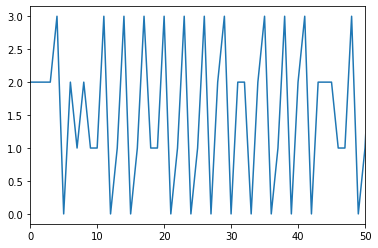

In [92]:
x_range = range(len(y))
plt.xlim(0, 50)
plt.plot(x_range,y)

In [93]:
result = model.predict(bob_says)

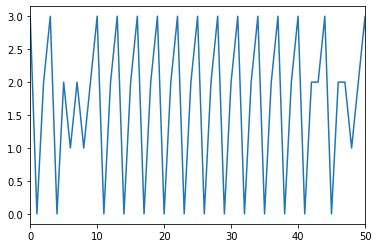

In [94]:
x_range = range(len(result))
plt.xlim(0,50)
plt.plot(x_range, result)

In [95]:
model.startprob_

array([2.64480979e-162, 5.88386855e-156, 3.52345424e-107, 1.00000000e+000])

In [96]:
model.transmat_

array([[7.09039843e-03, 5.79060041e-02, 9.01274166e-01, 3.37294313e-02],
       [1.49665332e-01, 2.83732703e-02, 8.20078262e-01, 1.88313614e-03],
       [2.60924679e-02, 5.30939964e-01, 3.55873468e-02, 4.07380221e-01],
       [9.49737190e-01, 1.81693274e-02, 5.70786381e-04, 3.15226959e-02]])

In [97]:
model.emissionprob_

array([[4.79543226e-006, 9.48517616e-020, 2.77371410e-013,
        7.79864402e-005, 1.52410975e-010, 6.39834673e-004,
        1.34294167e-003, 1.38624106e-003, 1.66153732e-090,
        8.89235223e-052, 6.45956589e-063, 1.77445664e-044,
        1.04885948e-003, 5.57215821e-004, 5.20592350e-003,
        2.49627159e-013, 1.04062633e-003, 1.11963759e-035,
        0.00000000e+000, 0.00000000e+000, 5.20661372e-172,
        0.00000000e+000, 1.89038377e-174, 0.00000000e+000,
        5.18388399e-004, 1.64456450e-011, 1.07913916e-095,
        5.74650423e-024, 5.50489393e-054, 2.32599570e-072,
        1.74808471e-003, 7.99273224e-004, 5.52144527e-003,
        1.40619603e-003, 9.33725673e-071, 3.56056798e-046,
        3.27028706e-040, 2.38292733e-108, 5.22775416e-011,
        7.39656392e-004, 0.00000000e+000, 3.94194179e-073,
        2.99017453e-075, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 2.06484185e-035, 3.20482844e-004,
        1.60377636e-025, 3.20810079e-054, 6.00183214e-06